In [1]:
import numpy as np

In [2]:
# Stirling numbers of second kind
# S = np.zeros((100,100), dtype=int)
S = [[0 for i in range(101)] for j in range(101)]

# Combinations
# C = np.zeros((100,100), dtype=int)
C = [[0 for i in range(101)] for j in range(101)]

In [3]:
def stirling(n,k,S):
#     print(n,k)
    if S[n][k] > 0: return S[n][k]
    if k>n or k==0 or n==0: return 0
    if k==1 or k==n:
        S[n][k]=1
    else:
        S[n][k] = stirling(n-1,k-1,S) + k*stirling(n-1,k,S)
    return S[n][k]

def combs(n,k,C,S):
    if C[n][k] > 0: return C[n][k]
    if k>n or k==0 or n==0: return 0
    c = 1 # n! / (n-k)!
    for i in range(n-k+1, n+1):
        c*=i
    C[n][k] = c*stirling(n,k,S)
    return C[n][k]

def H(n,z,C):
    h = 0
    for k in range(1,n+1):
        h += C[n][k] * (z**k)
    return h

def H_t(n,z,C):
    h = 0
    for k in range(1,n+1):
        h += k * C[n][k] * (z**k)
    return h

def E_cols(n,z,C):
    return H_t(n,z,C)/H(n,z,C)

In [4]:
for i in range(101):
    for j in range(101):
        stirling(i,j,S)
        combs(i,j,C,S)

In [5]:
print(C[4][2]) #84
print(C[4])
print (sum(C[4]))
print (H(4,1,C))
print (H_t(4,1,C))
print (E_cols(4,1,C))

84
[0, 4, 84, 144, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
256
256
700
2.734375


In [26]:
import matplotlib.pyplot as plt

def plot_expected_colors (N):
    max_gamma = 100
    z = [np.e**(-gamma) for gamma in range(max_gamma)]
    print(z)
    y = [E_cols(N,zz,C) for zz in z]
    plt.plot(range(max_gamma), y, '-ok')
    plt.xlabel("Gamma (g)") 
    plt.ylabel("Expected num. colors")
    plt.title(str(N) + " total sites / colors")
    plt.savefig("Expected_no_colors/(" + str(N)+","+str(N)+")_vary_gamma_.png", format="png")
    plt.show()

[1.0, 0.36787944117144233, 0.1353352832366127, 0.04978706836786395, 0.018315638888734186, 0.006737946999085469, 0.0024787521766663594, 0.0009118819655545166, 0.00033546262790251196, 0.00012340980408667962, 4.5399929762484875e-05, 1.670170079024567e-05, 6.144212353328214e-06, 2.260329406981056e-06, 8.315287191035685e-07, 3.0590232050182605e-07, 1.1253517471925921e-07, 4.13993771878517e-08, 1.5229979744712642e-08, 5.602796437537273e-09, 2.06115362243856e-09, 7.582560427911915e-10, 2.789468092868928e-10, 1.0261879631701903e-10, 3.775134544279102e-11, 1.3887943864964039e-11, 5.1090890280633316e-12, 1.879528816539086e-12, 6.914400106940213e-13, 2.543665647376927e-13, 9.35762296884019e-14, 3.4424771084699824e-14, 1.2664165549094198e-14, 4.658886145103406e-15, 1.7139084315420162e-15, 6.305116760147001e-16, 2.319522830243574e-16, 8.533047625744083e-17, 3.139132792048036e-17, 1.154822417301581e-17, 4.248354255291598e-18, 1.5628821893349923e-18, 5.749522264293572e-19, 2.1151310375910853e-19, 7.7

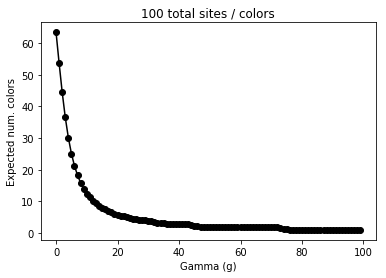

In [33]:
# Number of sites
N = 100
plot_expected_colors(N)